In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(rc={"figure.figsize":(15.,8.)})
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

# Goal: Can we predict the price of a house based on features?

## Fetch data

In [12]:
df=pd.read_csv('regression_data.csv')

In [13]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,13/10/2014,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,09/12/2014,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,25/02/2015,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,09/12/2014,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,18/02/2015,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


## Cleaning and wrangling data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [15]:
df.shape

(21597, 21)

## Exploration of data EDA

In [16]:
for c in df.columns:
    print(c, len(df[c].unique()))

id 21420
date 372
bedrooms 12
bathrooms 29
sqft_living 1034
sqft_lot 9776
floors 6
waterfront 2
view 5
condition 5
grade 11
sqft_above 942
sqft_basement 306
yr_built 116
yr_renovated 70
zipcode 70
lat 5033
long 751
sqft_living15 777
sqft_lot15 8682
price 3622


In [17]:
# by looking at the id and dates we found that some houses (177) were sold twice within the period of analysis
df['id'].value_counts()

795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64

In [18]:
# Dropping duplicates based on geolocation - latitude and longitud 
df.drop_duplicates(subset=['lat','long','date'], keep=False, inplace=True)

In [19]:
df.reset_index(drop=True, inplace=True)

In [20]:
df.shape

(21575, 21)

## Cleaning process

In [21]:
# Change yr_renovated column into 0 and 1. 0 = no renovation 1=renovation
df.loc[df['yr_renovated'] > 1900, 'yr_renovated'] = 1

In [22]:
df= df.drop(['id','date'],axis=1)

In [23]:
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21575.000000,21575.000000,21575.000000,2.157500e+04,21575.000000,21575.000000,21575.000000,21575.000000,21575.000000,21575.000000,21575.000000,21575.000000,21575.000000,21575.000000,21575.000000,21575.000000,21575.000000,21575.000000,2.157500e+04
mean,3.373395,2.115794,2080.353233,1.510961e+04,1.493882,0.007555,0.234438,3.410151,7.657845,1788.441066,291.912167,1970.990545,0.042317,98077.947532,47.560053,-122.213978,1986.553372,12766.418911,5.402503e+05
std,0.926169,0.768850,918.155148,4.143242e+04,0.539558,0.086593,0.766651,0.650662,1.173354,827.644144,442.805400,29.363270,0.201317,53.525294,0.138582,0.140730,685.237879,27287.020613,3.675172e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471050,-122.328000,1490.000000,5100.000000,3.219750e+05
50%,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571700,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10085.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,1.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


## Check correlation between features (all of them are numeric)

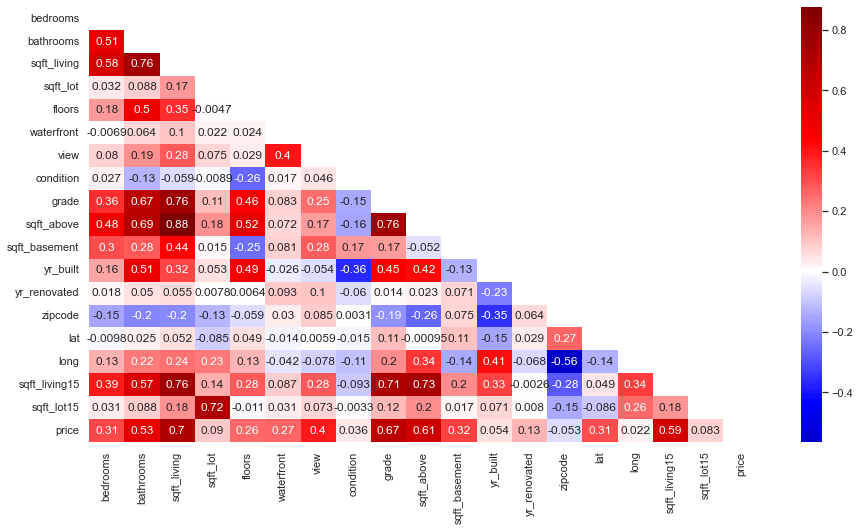

In [24]:
# correlation matrix heatmap 
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(df.corr(),mask=mask, annot=True,cmap='seismic',center=0);

# Rescale the features

In [25]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [26]:
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price']

In [27]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler()
df[columns] = min_max.fit_transform(df[columns])

# Select target and independent features

In [28]:
y= df['price']

In [29]:
X= df.drop(['price'], axis = 1)

# Import and apply a linear model

In [30]:
from sklearn.linear_model import LinearRegression as Lin
from sklearn.model_selection import train_test_split as tts

In [31]:
# define the model 
linreg=Lin()

In [32]:
# split the data into TT 
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=40)

In [33]:
# train the model on train 
linreg.fit(X_train,y_train)

LinearRegression()

In [34]:
#make some predictions on test 
y_pred=linreg.predict(X_test)

In [35]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import mean_absolute_error as mae 

In [36]:
r2(y_test,y_pred)

0.7106404815718707

In [37]:
mse(y_test,y_pred)

0.0006589227937474636

In [38]:
mae(y_test,y_pred)

0.01633647081731196

# Try another model: KNN regression

In [28]:
yR= df['price']

In [29]:
XR= df.drop(['price'], axis = 1)

In [30]:
X_trainR, X_testR, y_trainR, y_testR = train_test_split(XR, yR, test_size=0.30,random_state=40)

In [31]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2) # if we check the error plot, K=5 seems to be the best option

In [32]:
neigh.fit(X_trainR,y_trainR)

KNeighborsRegressor(n_neighbors=2)

In [33]:
y_predR=neigh.predict(X_testR)

In [34]:
r2(y_testR,y_predR) # % of accuracy of our model

0.7631394227918123

In [ ]:
error_train=[]
error_test=[]
for k in range(1,40):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_trainR,y_trainR)
    y_predR1=knn.predict(X_trainR)
    error_train.append(np.mean(y_trainR!=y_predR1)) # or append accuracy_score(y_test,y_pred)
    y_predR2=knn.predict(X_testR)
    error_test.append(np.mean(y_testR!=y_predR2))
plt.plot(range(1,40),error_train,label='train')
plt.plot(range(1,40),error_test,label='test')
plt.xlabel('k value')
plt.ylabel('error')
plt.legend();